In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Dataset
dataset = pd.read_csv("C:\\Users\ganesh\Downloads\\archive.zip")
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
#statistical measures
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

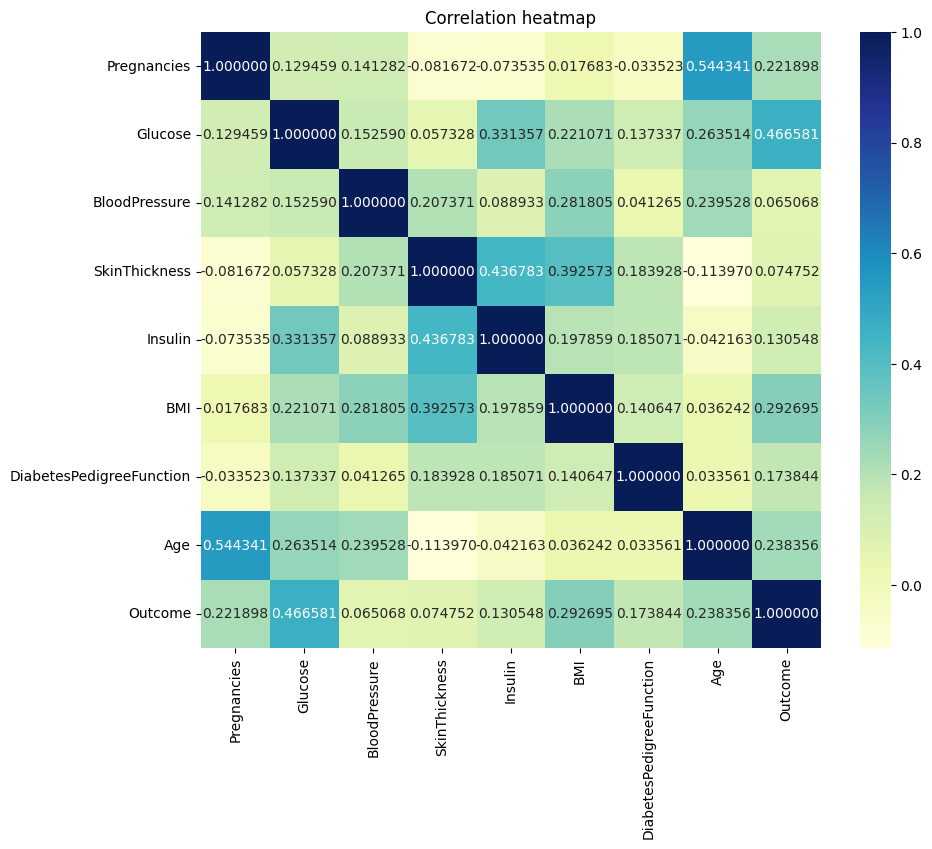

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot= True,fmt='3f', cmap= 'YlGnBu')
plt.title('Correlation heatmap')

C:\Users\prasa\AppData\Local\Temp\ipykernel_4028\601666201.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']== 1], color= "Red", shade = True)
C:\Users\prasa\AppData\Local\Temp\ipykernel_4028\601666201.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==0], color ="Blue", shade = True)


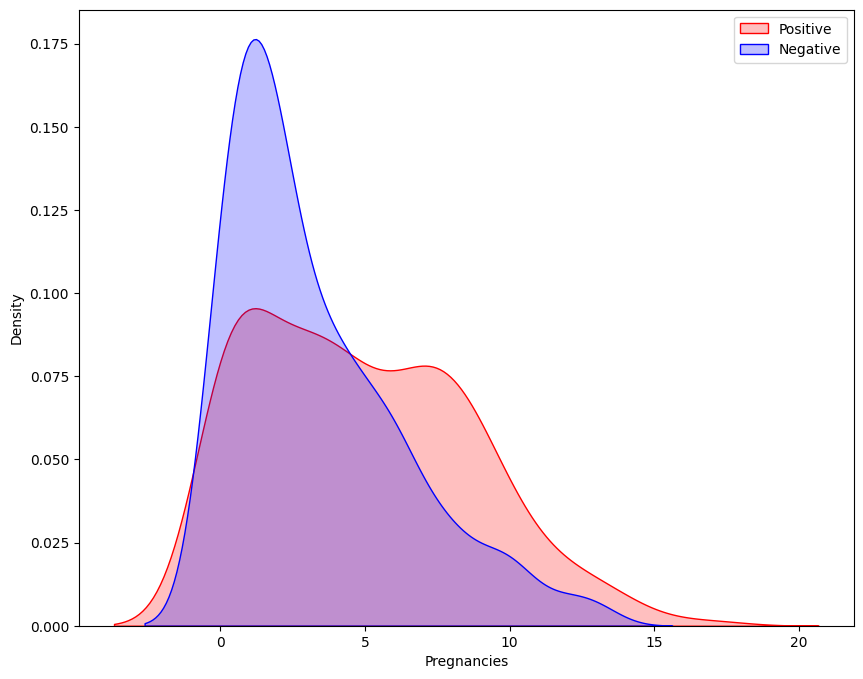

In [50]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']== 1], color= "Red", shade = True)
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==0], color ="Blue", shade = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

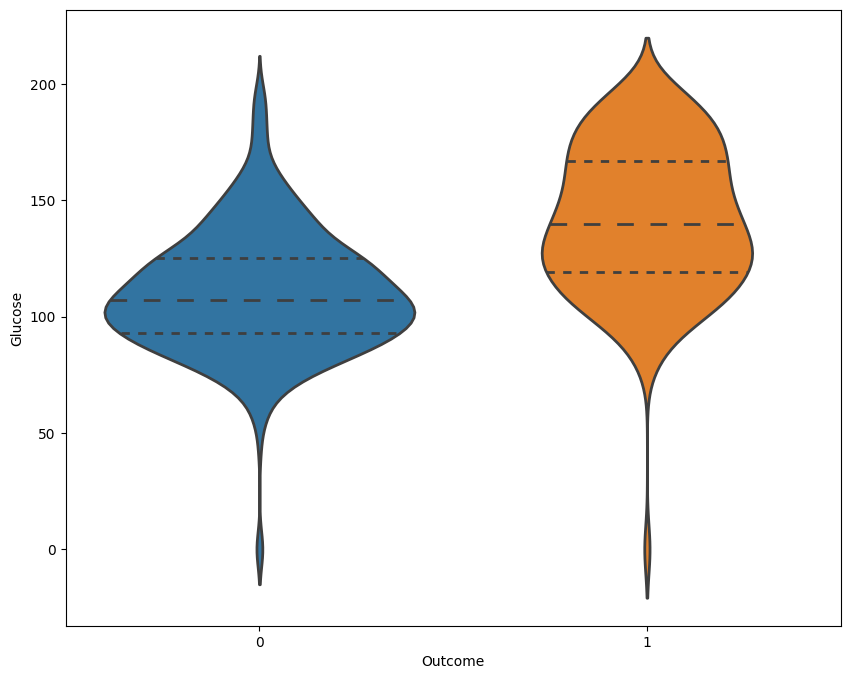

In [51]:
plt.figure(figsize=(10,8))
sns.violinplot(data = dataset, x = "Outcome", y = "Glucose", split= True , linewidth = 2 , inner= "quart")

C:\Users\prasa\AppData\Local\Temp\ipykernel_4028\3889819928.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome']== 1], color= "Red", shade = True)
C:\Users\prasa\AppData\Local\Temp\ipykernel_4028\3889819928.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome']==0], color ="Blue", shade = True)


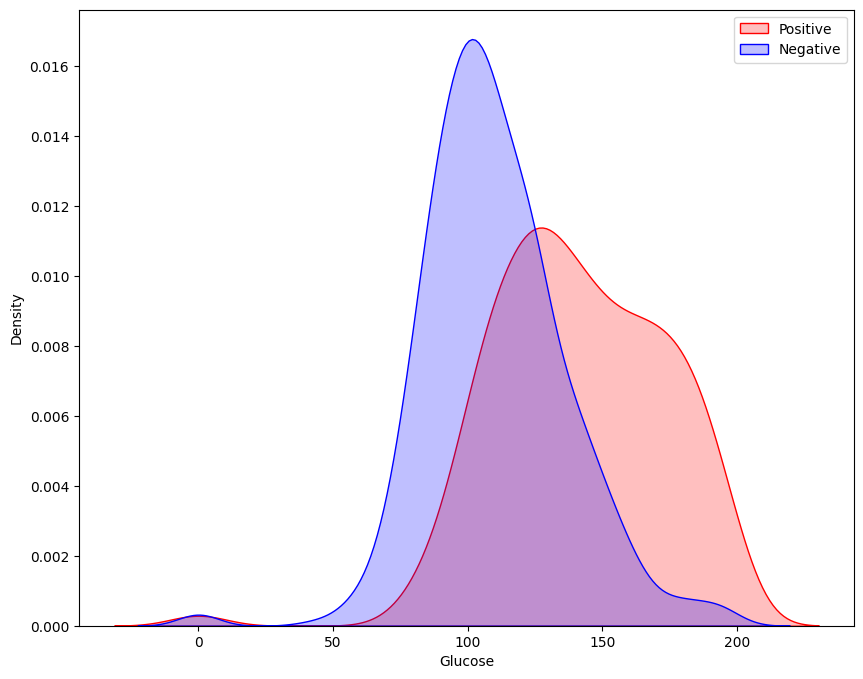

In [52]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome']== 1], color= "Red", shade = True)
kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome']==0], color ="Blue", shade = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

In [53]:
#Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0,dataset["Glucose"].median())

#BP
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
#BMI
dataset["BMI"] = dataset["BMI"].replace(0,dataset["BMI"].mean())

#Skinthickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())

#Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].mean())


In [54]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [55]:
#0--->non diabetics
#1---->diabetics


In [56]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.130597,75.123134,28.907494,141.426597,35.381288,0.550500,37.067164


In [57]:
#mean for glucose 141---> more glucose for diabetic
#mean for glucose 109--->less glucose for non diabetic

In [58]:
#seperating data and labels
x = dataset.drop(columns = 'Outcome', axis=1)
y = dataset['Outcome']

In [59]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [60]:
#0--->non diabetics
#1---->diabetics

In [61]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [62]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 10)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,2,89,90,30.0,79.799479,33.5,0.292,42
69,4,146,85,27.0,100.000000,28.9,0.189,27
667,10,111,70,27.0,79.799479,27.5,0.141,40
566,1,99,72,30.0,18.000000,38.6,0.412,21
97,1,71,48,18.0,76.000000,20.4,0.323,22
...,...,...,...,...,...,...,...,...
369,1,133,102,28.0,140.000000,32.8,0.234,45
320,4,129,60,12.0,231.000000,27.5,0.527,31
527,3,116,74,15.0,105.000000,26.3,0.107,24
125,1,88,30,42.0,99.000000,55.0,0.496,26


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
training_accuracy = []
test_accuracy = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n )
    knn.fit(x_train,y_train)
    
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    

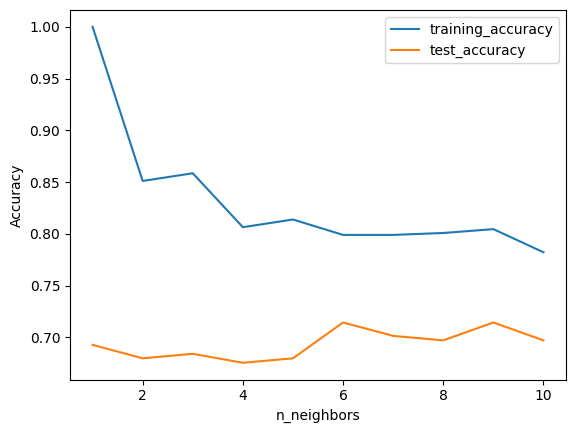

In [71]:
plt.plot(range(1,11), training_accuracy,label = "training_accuracy")
plt.plot(range(1,11),test_accuracy,label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [78]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train), ": Training_Accuracy")
print(knn.score(x_test, y_test), ": Testing_Accuracy")

0.8044692737430168 : Training_Accuracy
0.7142857142857143 : Testing_Accuracy


In [80]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train), ": Training_Accuracy")
print(dt.score(x_test, y_test), ": Testing_Accuracy")

1.0 : Training_Accuracy
0.7272727272727273 : Testing_Accuracy


In [87]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=4)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train), ": Training_Accuracy")
print(dt1.score(x_test, y_test), ": Testing_Accuracy")

0.8044692737430168 : Training_Accuracy
0.7532467532467533 : Testing_Accuracy


#Data Standardisation 

In [101]:
scalar = StandardScaler()
scalar.fit(x)
x_train_scaled= scalar.fit_transform(x_train)
x_test_scaled= scalar.fit_transform(x_test)


In [116]:
from sklearn.neural_network import MLPClassifier

mlp =MLPClassifier(random_state=4)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train), ": Training_Accuracy")
print(mlp.score(x_test,y_test), ": Testing_Accuracy")

0.7430167597765364 : Training_Accuracy
0.7012987012987013 : Testing_Accuracy
